In [1]:
# From here: https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
import sys
import os

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)


In [2]:
import numpy as np
import copy

import src.mcmc as mcmc
import src.utils as utils
from src.nqs import RBM, IsingHamiltonian, IsingHamiltonianReduced
from config_parser import get_config_file

import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
visible_size = 2
hidden_size = 4
seed = 44  # Seed for random number generator
walker_steps = 1000
gradient_steps = 100


In [4]:
np.random.seed(seed)

gamma = utils.random_gamma(visible_size)
ih = IsingHamiltonian(gamma=gamma)
ihr = IsingHamiltonianReduced(gamma=gamma[:len(gamma)])


In [5]:
eig,_ = np.linalg.eigh(ih)
I_truth = np.min(eig)
print(f"E_truth: {I_truth}")


E_truth: -0.7506147172558728


In [6]:
ising_reduced_rbm = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=ihr, walker_steps=walker_steps)
ir_energy_list = [it for it in ising_reduced_rbm.train(iter=gradient_steps, lr=0.01)]

Current ground state: -0.05181314671297999 for training step 0
Current ground state: -0.05458803431293858 for training step 1
Current ground state: -0.14491527296922996 for training step 2
Current ground state: -0.13032896546294861 for training step 3
Current ground state: -0.0653327791074538 for training step 4
Current ground state: -0.11968583508682008 for training step 5
Current ground state: -0.07422643145543929 for training step 6
Current ground state: -0.226063612102805 for training step 7
Current ground state: -0.08251709442713895 for training step 8
Current ground state: -0.08449903707809871 for training step 9
Current ground state: -0.15171460624830962 for training step 10
Current ground state: -0.09218075695445768 for training step 11
Current ground state: -0.2380425087831428 for training step 12
Current ground state: -0.1510259589279188 for training step 13
Current ground state: -0.11742512045567753 for training step 14
Current ground state: -0.2346251917241618 for training 

In [7]:
ising_rbm = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=ih, walker_steps=walker_steps)
i_energy_list = [it for it in ising_rbm.train(iter=gradient_steps, lr=0.01)]

Current ground state: -0.16270993986203086 for training step 0
Current ground state: -0.11345834543431019 for training step 1
Current ground state: -0.10105555683804349 for training step 2
Current ground state: -0.17453925785990507 for training step 3
Current ground state: -0.19216428719401676 for training step 4
Current ground state: -0.19031427714594834 for training step 5
Current ground state: -0.1448121383918432 for training step 6
Current ground state: -0.2084280352519526 for training step 7
Current ground state: -0.22435980773600944 for training step 8
Current ground state: -0.3384922615605215 for training step 9
Current ground state: -0.24383472194479902 for training step 10
Current ground state: -0.2624607347116757 for training step 11
Current ground state: -0.24267644230410923 for training step 12
Current ground state: -0.2697924823063752 for training step 13
Current ground state: -0.27343468498464246 for training step 14
Current ground state: -0.31557168842842154 for training

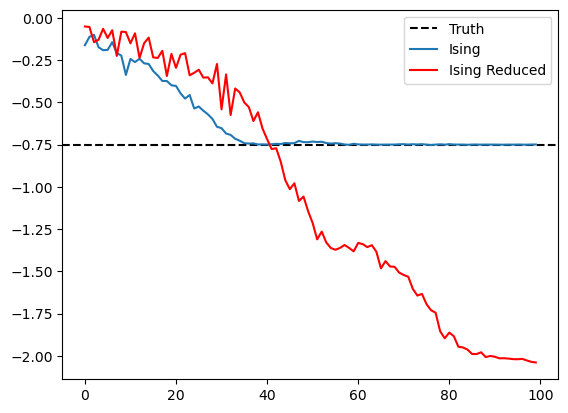

In [8]:
plt.axhline(y=I_truth, color='k', linestyle='--')
plt.plot(i_energy_list)
plt.plot(ir_energy_list, 'r')

plt.legend(['Truth', 'Ising', 'Ising Reduced'])

plt.show()